# 3DeeCellTracker Demo: Train StarDist3D
This notebook demonstrates how to train a StarDist3D model for cell segmentation. It is a revised version of a notebook originally from the StarDist project (URL: https://github.com/stardist/stardist/blob/master/examples/3D/2_training.ipynb), which includes programs based on a wrapper written by Chentao Wen for the StarDist package.

The demo data used in this notebook can be found in the "worm1_stardist_training_data" folder, which can be downloaded from https://osf.io/pgr95/."

## The basic procedures:

A. Import packages

B. Load training data

C. Configure StarDist3D model

D. Check data augmentation

E. Train StarDist3D

F. Optimize a threshold for segmentation

G. Confirm the segmentation results with trainied model

Please shutdown all other training/prediction notebooks before running this notebook (as those might occupy the GPU memory otherwise).

# 0- prise en charge GPU

In [1]:
import tensorflow as tf

tf.config.list_physical_devices(
    device_type=None
)

2024-04-19 11:30:33.806834: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2024-04-19 11:31:24.681628: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2024-04-19 11:31:24.768668: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:1c:00.0 name: Quadro RTX 6000 computeCapability: 7.5
coreClock: 1.77GHz coreCount: 72 deviceMemorySize: 23.64GiB deviceMemoryBandwidth: 625.94GiB/s
2024-04-19 11:31:24.768758: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2024-04-19 11:31:25.407963: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2024-04-19 11:31:25.408127: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublasLt.so

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [2]:
print(tf.config.list_physical_devices('GPU'))

[]


In [5]:
physical_devices = tf.config.list_physical_devices('GPU')
print("Num GPUs:", len(physical_devices))

Num GPUs: 1


# A - Import packages

In [2]:
#import os
#os.environ["KERAS_BACKEND"] = "jax"
#import keras

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
import CellTracker.stardistwrapper as sdw
#tensorflow.keras=keras

/var/tmp/pbs.9277385.pbs/ipykernel_30504/715608513.py:5: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


# B - Load training data

This code block is used to load raw images and the corresponding cell annotations for training the StarDist model.

## Parameters
path_train_images: A string specifying the file path to the raw images.
path_train_labels: A string specifying the file path to the annotated label images (where each cell has a different label).
## Notes
To specify the file paths for the training images and labels, you need to provide a string that tells the program where to find the images and labels. This string should include a special pattern that matches all files with the extension .tif in the directories where the images and labels are located. This pattern is called a Unix glob pattern and it looks like this: *.tif.

For example, if your training images are located in a directory called "images" and your labels are located in a directory called "labels", you can specify the file paths like this:

    path_train_images = './images/*.tif'
    path_train_labels = './labels/*.tif'
This tells the program to look for all files with the extension .tif in the "images" and "labels" directories.

The "./" refers to the current working directory that contains this notebook.

In addition, the training images and labels must be saved as 3D image stacks in .tif format, which is required by the "stardist" package used in this notebook. The corresponding image and label should have the same filename but in different directories. For example, if the image file is called "image001.tif", then the corresponding label file should also be called "image001.tif". You can check the downloaded demo data to see examples of how the images and labels are named.

100%|██████████| 34/34 [00:10<00:00,  3.10it/s]


number of images:  34
- training:        29
- validation:       5
X[0].shape=(231, 356, 336)


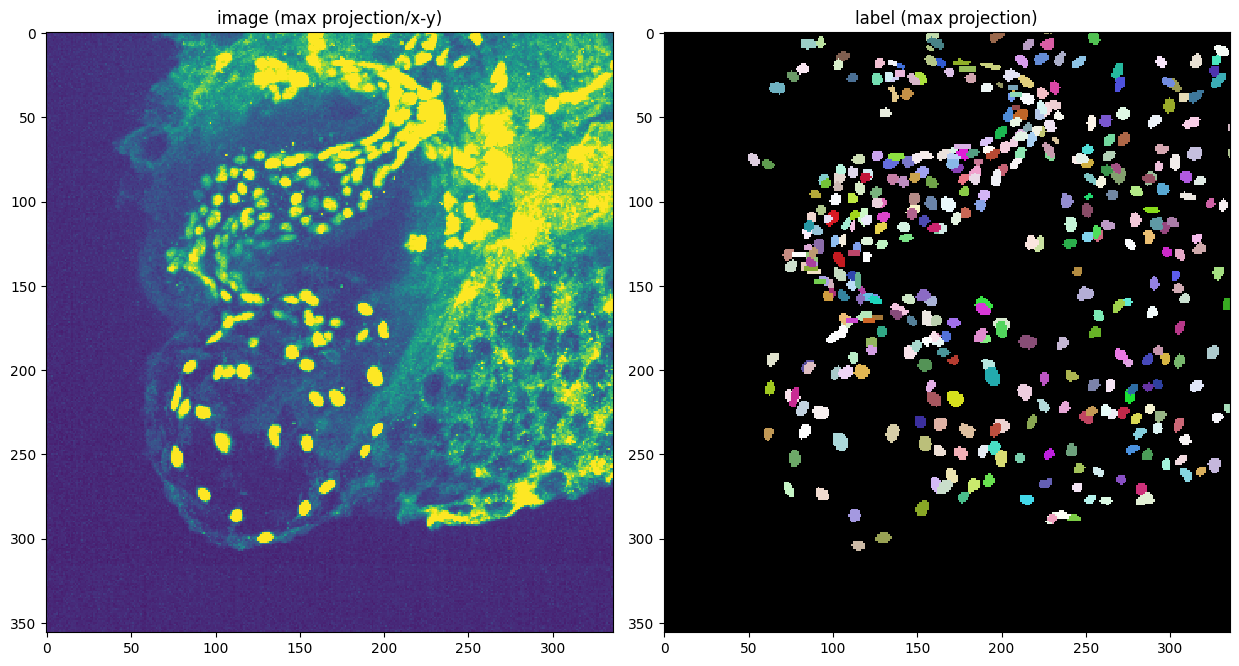

In [3]:
path_train_images = './ground_truths/raw_images/*.tif*'
path_train_labels = './ground_truths/labels/*.tif*'


X, Y, X_trn, Y_trn, X_val, Y_val, n_channel = \
    sdw.load_training_images(path_train_images, path_train_labels, max_projection=True)

In [ ]:
#import os
#os.environ["KERAS_BACKEND"] = "jax"
#import keras


#print("Version TensorFlow:", tf.__version__)
#print("Version Keras:", keras.__version__)

# C - Configure StarDist3D model
This code block create a StarDist3D model for training.

In [4]:
model_name="stardist_worm1"

model = sdw.configure(Y, n_channel, model_name=model_name)

empirical anisotropy of labeled objects = (1.0, 1.5714285714285714, 1.375)
div_by=[16  8 16]
n_dim: 3
axes: ZYXC
n_channel_in: 1
n_channel_out: 97
train_checkpoint: weights_best.h5
train_checkpoint_last: weights_last.h5
train_checkpoint_epoch: weights_now.h5
n_rays: 96
grid: (2, 1, 2)
anisotropy: (1.0, 1.5714285714285714, 1.375)
backbone: unet
rays_json: {'name': 'Rays_GoldenSpiral', 'kwargs': {'n': 96, 'anisotropy': (1.0, 1.5714285714285714, 1.375)}}
n_classes: None
unet_n_depth: 2
unet_kernel_size: (3, 3, 3)
unet_n_filter_base: 32
unet_n_conv_per_depth: 2
unet_pool: (2, 2, 2)
unet_activation: relu
unet_last_activation: relu
unet_batch_norm: False
unet_dropout: 0.0
unet_prefix: 
net_conv_after_unet: 128
net_input_shape: (None, None, None, 1)
net_mask_shape: (None, None, None, 1)
train_patch_size: [80, 56, 56]
train_background_reg: 0.0001
train_foreground_only: 0.9
train_sample_cache: True
train_dist_loss: mae
train_loss_weights: (1, 0.2)
train_class_weights: (1, 1)
train_epochs: 400
t

base_model.py (149): output path for model already exists, files may be overwritten: /rds/general/user/ecd24/home/stardist_models/stardist_worm1
2024-04-19 11:35:13.965381: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-19 11:35:13.968163: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:1c:00.0 name: Quadro RTX 6000 computeCapability: 7.5
coreClock: 1.77GHz coreCount: 72 deviceMemorySize: 23.64GiB deviceMemoryBandwidth: 625.94GiB/s
2024-04-19 11:35:13.969279: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1871] Adding visible gpu devices: 0
2024-04-19 11:35:13.969347: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully open

Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.198116, nms_thresh=0.3.


2024-04-19 11:35:25.190633: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2024-04-19 11:35:25.203978: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2100000000 Hz
2024-04-19 11:35:26.413164: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudnn.so.8
2024-04-19 11:35:30.073497: I tensorflow/stream_executor/cuda/cuda_dnn.cc:359] Loaded cuDNN version 8100
2024-04-19 11:35:36.943843: E tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-04-19 11:35:36.943891: W tensorflow/stream_executor/gpu/asm_compiler.cc:56] Couldn't invoke ptxas --version
2024-04-19 11:35:36.944626: E tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-04-19 11:35:36.944723: W tensorflow/stream_executor/gpu/redzone_allocator.cc:31

median object size:      [11.  7.  8.]
network field of view :  [46 26 46]


# D - Check data augmentation

Data augmentation is used to create additional data that can improve the accuracy of the StarDist model. 
This code block displays some samples of the augmented images and labels for verification purposes. 
By checking the augmented data, you can ensure that the generated images and labels are reasonable.

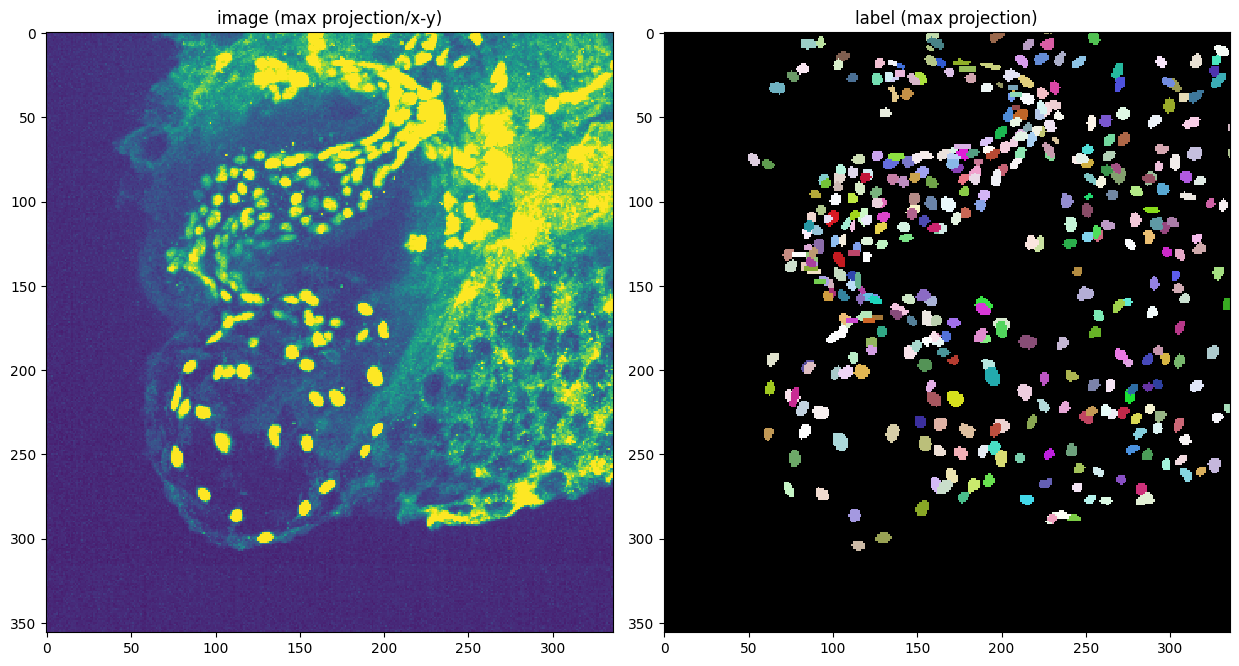

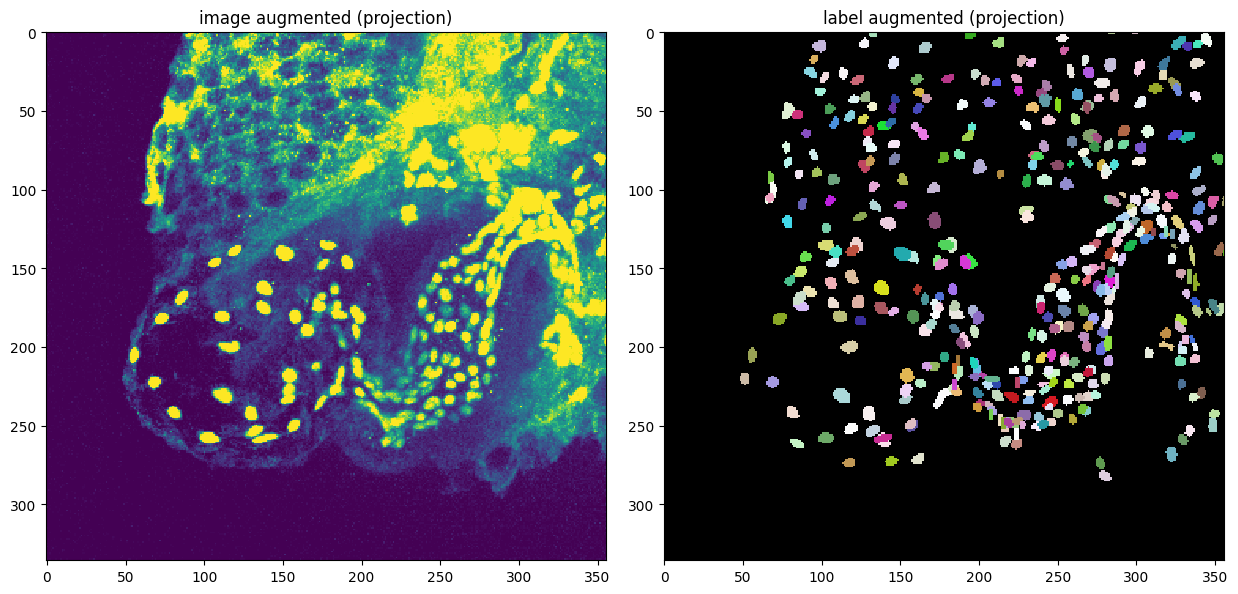

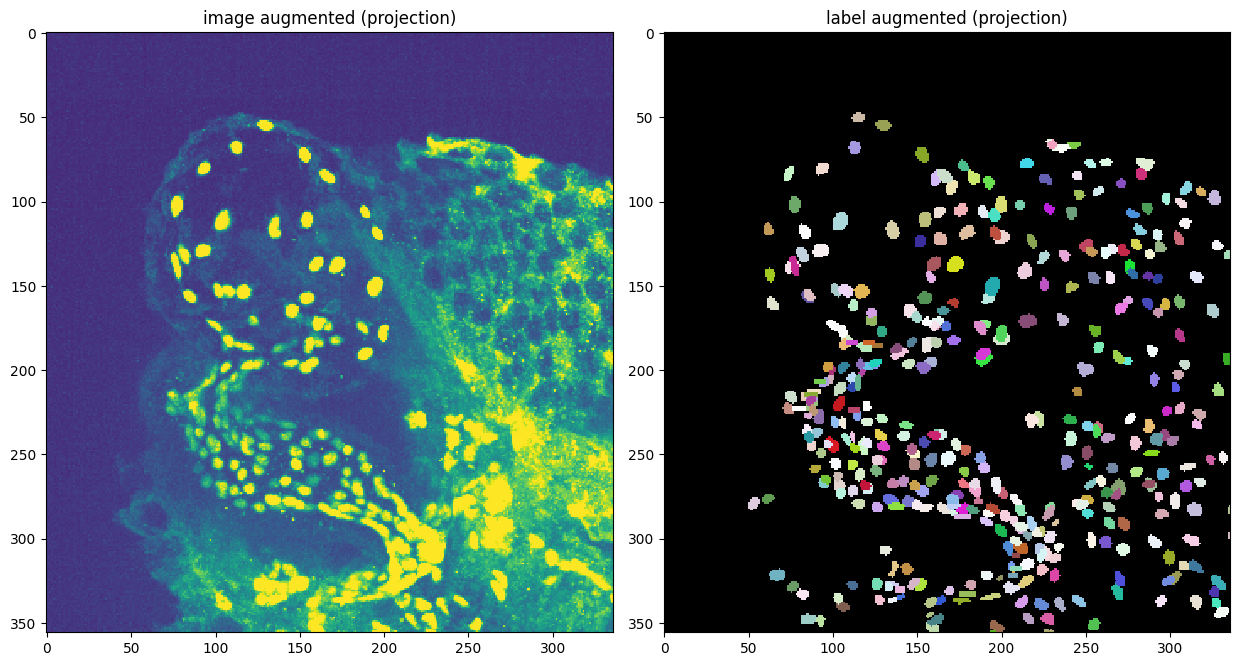

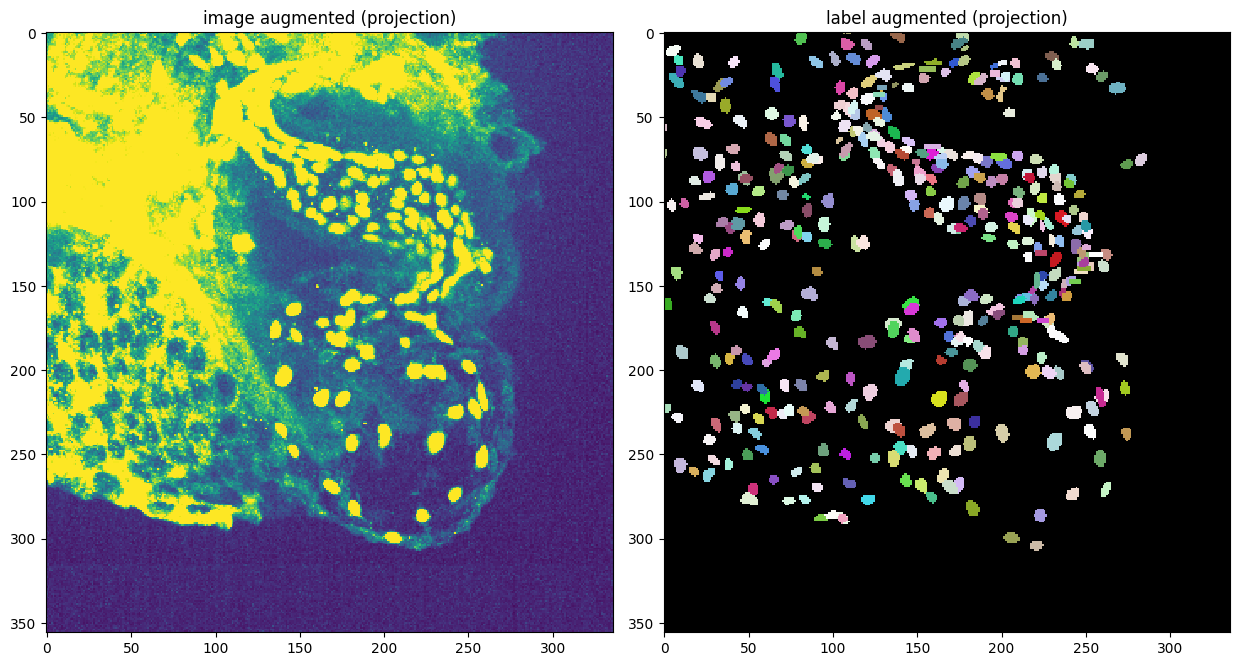

In [5]:
# plot some augmented examples
img, lbl = X[0],Y[0]
sdw.plot_img_label_max_projection(img, lbl)
for _ in range(3):
    img_aug, lbl_aug = sdw.augmenter(img,lbl)
    sdw.plot_img_label_max_projection(img_aug, lbl_aug, img_title="image augmented (projection)", lbl_title="label augmented (projection)")

# E - Train StarDist3D
 ## Parameters
epochs: An integer specifying the number of epochs for training. A larger number of epochs will require a longer training time. The default value of 500 is a reasonable choice.

In [ ]:
epochs=500

model.train(X_trn, Y_trn, validation_data=(X_val,Y_val), augmenter=sdw.augmenter, epochs=500)

Epoch 1/500
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Unable to locate the source code of <function _gcd_import at 0x14e44a9d9310>. Note that functions defined in certain environments, like the interactive Python shell do not expose their source code. If that is the case, you should to define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Unable to locate the source code of <function _gcd_import at 0x14e44a9d9310>. Note that functions defined in certain environments, like the interactive 

Temps total epochs = 60sec + 499*12sec = 6048

6048/3600 = 1.68h

0.68*60/1 = 40.8 min

0.8*60/1 = 48sec

120*0.001*499+542*0.001 = 60.422sec = 1min

temps total = 1h 41min 48sec

# F - Threshold optimization
While the default values for the probability and non-maximum suppression thresholds already yield good results in many cases, we still recommend to adapt the thresholds to your data. The optimized threshold values are saved to disk and will be automatically loaded with the model.

In [7]:
model.optimize_thresholds(X_val, Y_val)

NMS threshold = 0.5:  80%|████████  | 16/20 [03:30<00:52, 13.15s/it, 0.452 -> 0.553]


Using optimized values: prob_thresh=0.450644, nms_thresh=0.3.
Saving to 'thresholds.json'.


{'prob': 0.45064365790622507, 'nms': 0.3}

# G - Confirm the segmentation results with trained model
This code block is used to segment cells with the trained StarDist model. The first validation image is segmented and the results are displayed.

Note: If only one 3D image/label was provided for training in section B, the segmentation of this training image will be displayed.

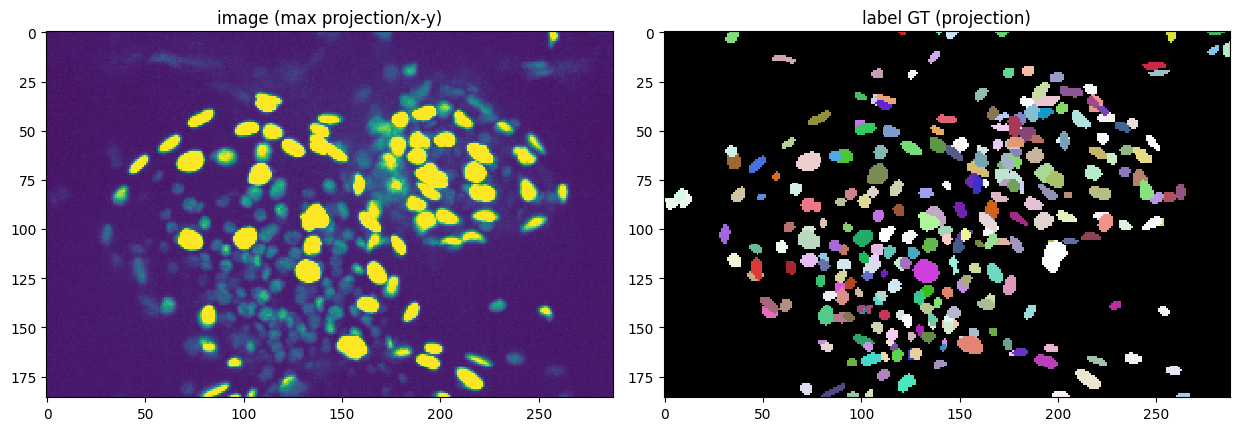

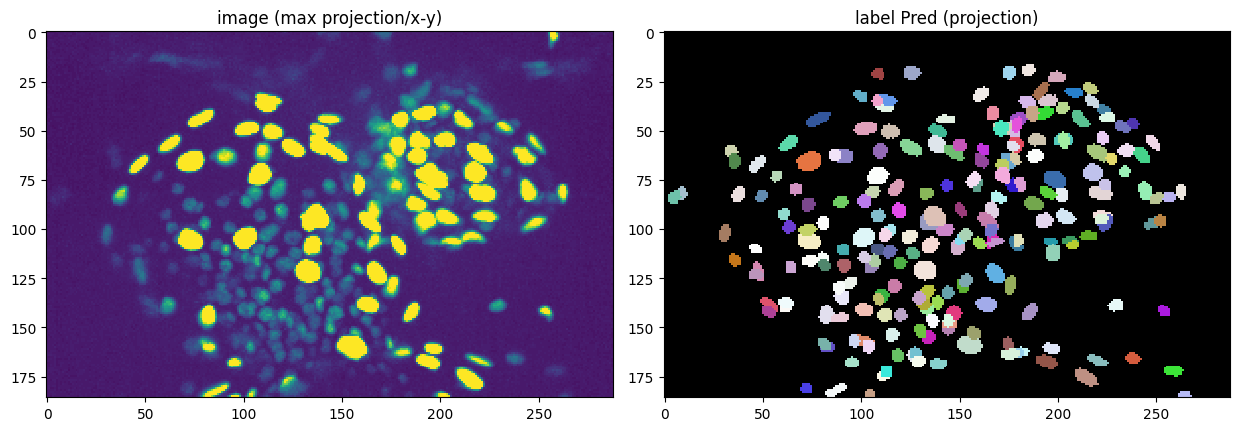

In [8]:
Y0_val_pred, prob_map = model.predict_instances(X_val[0], show_tile_progress=False)[0]
sdw.plot_img_label_max_projection(X_val[0],Y_val[0], lbl_title="label GT (projection)")
sdw.plot_img_label_max_projection(X_val[0],Y0_val_pred, lbl_title="label Pred (projection)")